In [1]:
# Install & Import Library
!pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/lda-dataset/predicted-pre-lda.csv')

In [28]:
df

,full_text,sentiment,topic,specific_topic,bps_topic
0,halo semuanya memiliki project donasi salurkan...,neutral,4,Lainnya,Perumahan
1,gerakan bapak asuh dandim 1418mamuju selenggar...,neutral,1,Lainnya,Pangan
2,kolaborasi 3 pilar memberikan bantuan mengalam...,neutral,2,Lainnya,Perlindungan Sosial
3,permasalahan terjadi mulai kandungan baru terl...,neutral,5,Anggaran,Gizi
4,1 hingga kini masalah serius merupakan kondisi...,negative,4,Anggaran,Perumahan
...,...,...,...,...,...
6021,perhatikan pola asuh kandungan gizi makanan te...,neutral,4,Gizi,Perumahan
6022,daddyminussugar recehtapisayng eh segitu tau e...,negative,3,Distribusi,Pendidikan
6023,ah ide trus tar status gizi misal 2th berat br...,negative,3,Distribusi,Pendidikan
6024,schfess bukannya dicegah sejak 1000 hari lahir...,negative,5,Anggaran,Gizi


In [3]:
# Display the first few rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6026 entries, 0 to 6025
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  6026 non-null   object
 1   sentiment  6026 non-null   object
dtypes: object(2)
memory usage: 94.3+ KB


In [4]:
df.groupby('sentiment').head()

,full_text,sentiment
0,tanyakanrl halo semuanya memiliki project stun...,neutral
1,gerakan bapak asuh anak stunting dandim 1418ma...,neutral
2,kolaborasi 3 pilar memberikan bantuan anak men...,neutral
3,permasalahan stunting terjadi mulai dalam kand...,neutral
4,1 stunting hingga kini menjadi masalah serius ...,negative
5,menyerahkan program bantuan pangan protein ber...,neutral
9,mbak yuyun aniatul farah salah satu kader pkk ...,positive
13,bisa terjadi stunting anak,negative
21,3 bahan makanan kaya nutrisi pencegah stunting...,positive
29,el_avraham kamu sumbang panti asuhan kasihan s...,negative


In [5]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00:00:01


In [6]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

custom_stopwords = ["nya", "yg", "jg", 'aja', 'utk', 'di', 'dgn', 'tp', 'lah', 'jd', 'udh', 'pa', 'amp', 'bgt', 'krn'
                   'tuh', 'kan', 'krn', 'klo', 'sih', 'apa', 'yang', 'kalo', 'biar', 'untuk', 'dr', 'juga', 'itu', 'si', 'tau'
                   'yang', 'kok', 'ada','nih', 'doang', 'gitu', 'udah', 'tuh', 'ini', 'pas', 'jadi', 'tu', 'sdh', 'trs', 'kek',
                   'melalui', 'buat' 'kalau', 'yes', 'nah', 'kalau', 'pake', 'buat', 'dulu', 'gpmmd', 'gpmmd 4palu', 'gpmmd 4donggala'
                   'carafitnahkelautaja', 'masbowogibran', '4donggala', '4palu', 'dg', 'loh', '4kupang', 'mah', 'gini', 'kl', 'deh', 
                    '4kupang', 'stunting', 'mencegah stunting', 'pencegahan stunting', 'penurunan', 'penanganan', 'indonesia', 'atasi', 'cegah', 'stunting indonesia',
                    'program stunting', 'salah satu', 'penurunan stunting', 'melalui program', 'program', 'mencegah', 'anak', 'anakanak', 'pak ganjar', 'ganjar pranowo', 'ganjar',
                    'pranowo', 'pak', "saya", 'gua', 'gw', 'aku', 'lu', 'sy', 'gue', 'semua', 'sama', 'cuma' 'salah satu', 'salah', 'satu', 'gw', 'bagus',
                    'ganjar pranowo', 'bukan', 'banget', 'pencegahan', 'prabowo', 'carafitnahkelautaja', 'efekdahsyat makangratis', 'efekdahsyat', 'ganjarmahfud',
                    'emg', 'punya', 'ganjarpranowo', 'cuma', 'upaya', 'menurunkan angka', 'menurunkan', 'angka', 'menekan angka', 'lebih baik',
                    'ganjarmahfud2024', 'mahfud md', 'mahfud', 'md', 'emang', '3mandatganjarmahfud l3bihbaik', 'mau', '3mandatganjarmahfud', 'nikamtul_sg',
                    'l3bihbaik', 'dulujokowisekarangganjar coblos3', 'dulujokowisekarangganjar', 'coblos3', 'coblos3 sukses', 'ganjarmahfudm3nangdebat',
                    'pranowoprof', 'the', 'of', 'and', 'to', 'in', 'tanyakanrl', 'is', 'for', 'children', 'food', '5ng', 'menjadi', 'jawa', 'depok', 'air', 'telur', 'bareng', 'gama', 'satset', 
                    'the', 'of', 'and', 'to', 'in', 'desa', 'kota', 'ibu', 'jateng', 'tengah', 'bangga', 'kencana', 'nutrition', 'kancing', 'pmt', 'merah', 'maksi', 'dpp_pkb',
                     'masyarakat', 'mantap', 'jakarta', 'emas', 'tanyakanrl', 'ri', 'yuk', 'on', 'prabowogibran', 'makangratis', 'role', 'this']

def preprocess_text(text, custom_stopwords):
    # Ensure text is stripped and extra spaces are removed
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove punctuation and lowercase text
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Change 'ga' and 'gak' to 'tidak'
    text = re.sub(r'\btdk\b', 'tidak', text)
    text = re.sub(r'\bngga\b', 'tidak', text)
    text = re.sub(r'\bgk\b', 'tidak', text) 
    text = re.sub(r'\bga\b', 'tidak', text)
    text = re.sub(r'\bgak\b', 'tidak', text)
    # Remove Sastrawi stopwords
    text = stopword_remover.remove(text)
    # Remove custom stopwords
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    return ' '.join(words)

def clean_tweet(tweet):
    # Replace URLs with a common token
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Replace mentions with a common token
    #tweet = re.sub(r'@\w+', '@USER', tweet)
    # Optionally normalize hashtags (comment out if you want to keep them as is)
    #tweet = re.sub(r'#\w+', '#HASHTAG', tweet)
    # Remove special characters and extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

emojis = {':)': 'senyum', ':-)': 'senyum', ';d': 'mengedipkan mata', ':-E': 'vampir', ':(': 'sedih', 
          ':-(': 'sedih', ':-<': 'sedih', ':P': 'meledek', ':O': 'kaget',
          ':-@': 'kaget', ':@': 'kaget',':-$': 'bingung', ':\\': 'kesal', 
          ':#': 'diam', ':X': 'diam', ':^)': 'senyum', ':-&': 'bingung', '$_$': 'rakus',
          ':-!': 'bingung', ':-D': 'senyum', ':-0': 'berteriak', 'O.o': 'bingung',
          '<(-_-)>': 'robot', 'd[-_-]b': 'ok', ';)': 'mengedipkan mata', 
          ';-)': 'mengedipkan mata',}

def replace_emojis(tweet):
    for emoji, replacement in emojis.items():
        tweet = tweet.replace(emoji, replacement)
    return tweet

def lower_case(text):  
    text = text.lower()
    return text

In [7]:
df['full_text'] = df['full_text'].apply(clean_tweet)
df['full_text'] = df['full_text'].apply(lambda x: preprocess_text(x, custom_stopwords))
df['full_text'] = df['full_text'].apply(replace_emojis)
df['full_text'] = df['full_text'].apply(lower_case)

Sentiment Distribution:
 sentiment
neutral     3273
negative    2176
positive     577
Name: count, dtype: int64


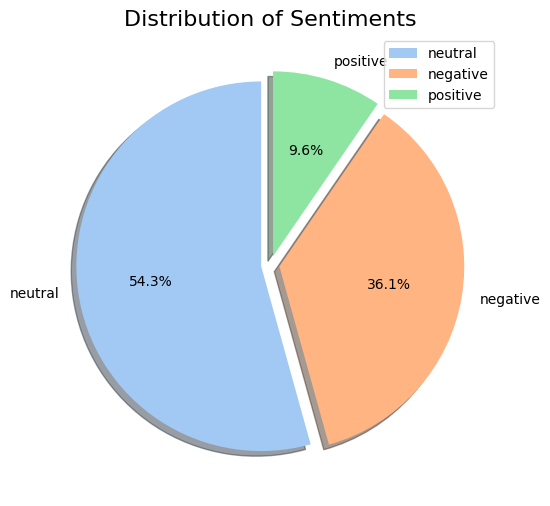

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()

# Print the sentiment distribution
print("Sentiment Distribution:\n", sentiment_distribution)

# Membuat warna yang menarik menggunakan seaborn
colors = sns.color_palette('pastel')[0:len(df['sentiment'].unique())]

# Plot distribusi sentimen
plt.figure(figsize=(10, 6))
distribution_of_sentiment = df['sentiment'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    shadow=True, 
    explode=(0.05, 0.05, 0.05)  # Memberikan efek explode pada setiap segmen
)

# Menambahkan judul
plt.title('Distribution of Sentiments', fontsize=16)

# Menghapus label default pada sumbu y
plt.ylabel('')

# Menambahkan legend
plt.legend(labels=df['sentiment'].value_counts().index, loc="upper right")

# Menampilkan plot
plt.show()


In [9]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['full_text'])

In [10]:
from sklearn.decomposition import LatentDirichletAllocation
# Apply LDA
num_topics = 6  # Number of topics to discover
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Display the top words for each topic
feature_names = tfidf.get_feature_names_out()
topic_words = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_idx = topic.argsort()[:-10 - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    topic_words[f'Topic {topic_idx + 1}'] = top_features

print("Top words for each topic:")
for topic, words in topic_words.items():
    print(topic, ": ", words)

# Assign topics to documents
df['topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

print("Documents with their assigned topics:")
print(df[['full_text', 'topic']])

# Count the number of documents assigned to each topic
topic_counts = df['topic'].value_counts().sort_index()
topic_counts.index = [f'Topic {i + 1}' for i in topic_counts.index]

print("\nNumber of documents assigned to each topic:")
print(topic_counts)

Top words for each topic:
Topic 1 :  ['polres', 'susu', 'ketua', 'peduli', 'asuh', 'bhayangkari', 'polri', 'berikan', 'kapolres', 'manis']
Topic 2 :  ['sehat', 'sejak', 'hamil', 'kesehatan', 'nutrisi', 'gizi', 'kandungan', 'dini', 'lebih', 'harapan']
Topic 3 :  ['gizi', 'pertumbuhan', 'hari', 'tumbuh', 'tahun', 'orang', 'usia', 'tinggi', 'masalah', 'badan']
Topic 4 :  ['kesehatan', 'menekan', 'depan', 'keluarga', 'memberikan', 'kesejahteraan', 'tumbuh', 'dukungan', 'semoga', 'mengatasi']
Topic 5 :  ['makan', 'gratis', 'sekolah', 'banyak', 'siang', 'gizi', 'susu', 'bikin', 'hamil', 'orang']
Topic 6 :  ['babinsa', 'bantuan', 'asuh', 'koramil', 'tambahan', 'melaksanakan', 'makanan', 'kegiatan', 'pemberian', 'kodim']
Documents with their assigned topics:
                                              full_text  topic
0     halo semuanya memiliki project donasi salurkan...      2
1     gerakan bapak asuh dandim 1418mamuju selenggar...      3
2     kolaborasi 3 pilar memberikan bantuan mengal

In [11]:
# Assign topics to documents
df['topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

# Map topic values to the specified labels
topic_labels = {  
    0: "Dukungan Bantuan Pemerintah",    
    1: "Program Pemerintah dan Masyarakat",     
    2: "Program Inisiatif Tokoh Politik",
    3: "Kesehatan Ibu dan Anak",  
    4: "Dukungan Gizi dan Makanan Gratis",
    5: "Kampanye Kesehatan dan Program Keluarga"
}

df['topic'] = df['topic'].map(topic_labels)

# Print documents with their assigned topics
print("Documents with their assigned topics:")
print(df[['full_text', 'topic']])

Documents with their assigned topics:
                                              full_text  \
0     halo semuanya memiliki project donasi salurkan...   
1     gerakan bapak asuh dandim 1418mamuju selenggar...   
2     kolaborasi 3 pilar memberikan bantuan mengalam...   
3     permasalahan terjadi mulai kandungan baru terl...   
4     1 hingga kini masalah serius merupakan kondisi...   
...                                                 ...   
6021  perhatikan pola asuh kandungan gizi makanan te...   
6022  daddyminussugar recehtapisayng eh segitu tau e...   
6023  ah ide trus tar status gizi misal 2th berat br...   
6024  schfess bukannya dicegah sejak 1000 hari lahir...   
6025                     mas_veel kadrun dibungkam otak   

                                  topic  
0       Program Inisiatif Tokoh Politik  
1                Kesehatan Ibu dan Anak  
2                Kesehatan Ibu dan Anak  
3     Program Pemerintah dan Masyarakat  
4       Program Inisiatif Tokoh Politik  
.

In [12]:
# Menampilkan sampel data berdasarkan setiap aspek
samples_by_topic = df.groupby('topic').apply(lambda x: x.sample(n=3))

# Menampilkan hasil
samples_by_topic

/tmp/ipykernel_33/2667203484.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples_by_topic = df.groupby('topic').apply(lambda x: x.sample(n=3))


full_text  \
topic                                                                                             
Dukungan Bantuan Pemerintah             296                               respect polisi peduli   
                                        1061  salamsantun_ humairah_922 allahu akbar jangank...   
                                        1970  ketua umum bhayangkari ny juliati sigit bersam...   
Dukungan Gizi dan Makanan Gratis        4020  ainunnajib gemoy harusnya bikin live sad bor s...   
                                        4587  1 t hari brrt selama 5 tahun 1825 t senilai 15...   
                                        1113  ortunya kesiapan emosional finansial langsung ...   
Kampanye Kesehatan dan Program Keluarga 1124  13 rawan bantuan orang tua asuh noborejo salat...   
                                        245   gerindra sikka wajibkan kader peduli umkm ntt ...   
                                        5631  memutus babinsa koramil kandis cek kelurahan s...   
Kesehatan Ibu dan Anak                  1105  dinas pemberdayaan perempuan perlindungan peng...   
                                        3415  menekan menunjukkan kepedulian mendalam keseja...   
                                        3519  memberikan gambaran masa depan cerah mana tumb...   
Program Inisiatif Tokoh Politik         4410  padahal 2 fisik intelektual canangkan hamil me...   
                                        4021  waktu masa awal tumbuh kembang kayanya segala ...   
                                        3464  berarti menyelamatkan masa depan negara bangsa...   
Program Pemerintah dan Masyarakat       5058  jangan diremehkan moms ternyata dicegah sejak ...   
                                        5290  sone5zero97b petitestardust sedang bermasalah ...   
                                        3327  dahnilanzar makan siang gratis u sekolah efekt...   

                                             sentiment  \
topic                                                    
Dukungan Bantuan Pemerintah             296   positive   
                                        1061  positive   
                                        1970   neutral   
Dukungan Gizi dan Makanan Gratis        4020  negative   
                                        4587  negative   
                                        1113  positive   
Kampanye Kesehatan dan Program Keluarga 1124   neutral   
                                        245    neutral   
                                        5631   neutral   
Kesehatan Ibu dan Anak                  1105   neutral   
                                        3415   neutral   
                                        3519   neutral   
Program Inisiatif Tokoh Politik         4410   neutral   
                                        4021  negative   
                                        3464   neutral   
Program Pemerintah dan Masyarakat       5058   neutral   
                                        5290  negative   
                                        3327   neutral   

                                                                                topic  
topic                                                                                  
Dukungan Bantuan Pemerintah             296               Dukungan Bantuan Pemerintah  
                                        1061              Dukungan Bantuan Pemerintah  
                                        1970              Dukungan Bantuan Pemerintah  
Dukungan Gizi dan Makanan Gratis        4020         Dukungan Gizi dan Makanan Gratis  
                                        4587         Dukungan Gizi dan Makanan Gratis  
                                        1113         Dukungan Gizi dan Makanan Gratis  
Kampanye Kesehatan dan Program Keluarga 1124  Kampanye Kesehatan dan Program Keluarga  
                                        245   Kampanye Kesehatan dan Program Keluarga  
                                        5631  Kampanye Kesehatan

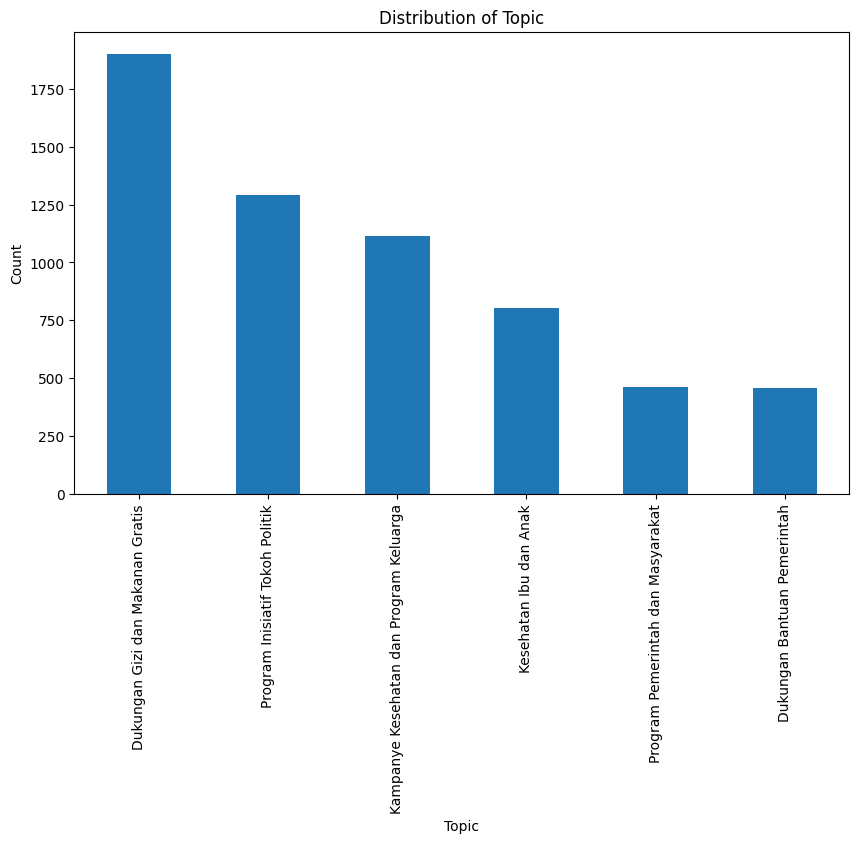

In [13]:
# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
df['topic'].value_counts().plot(kind='bar')
plt.title('Distribution of Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


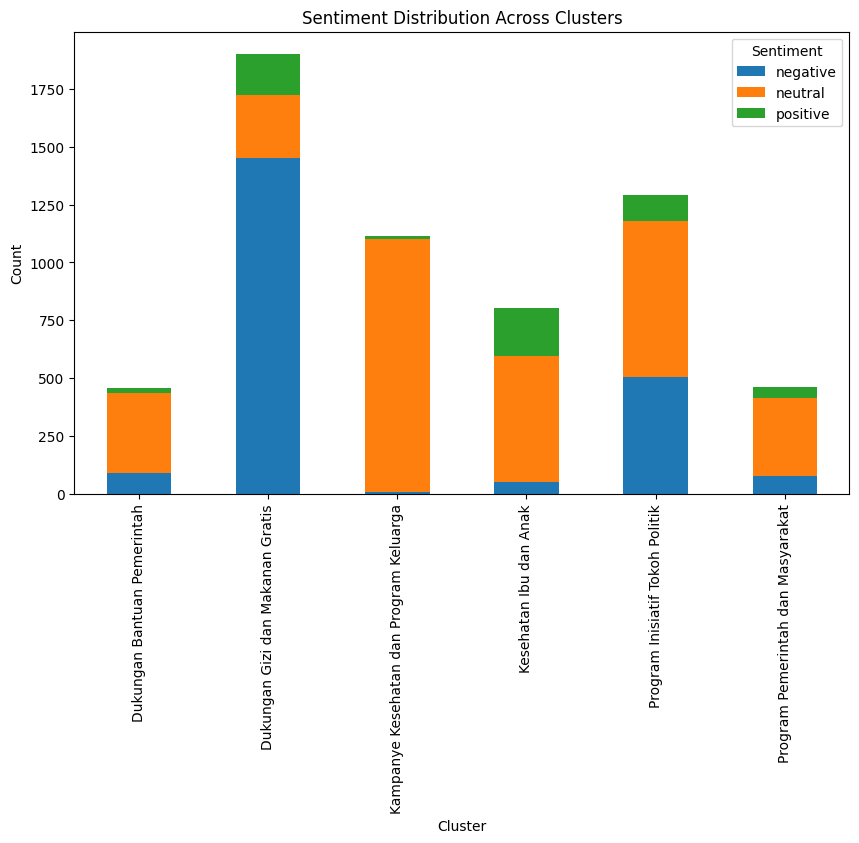

sentiment                                negative  neutral  positive
topic                                                               
Dukungan Bantuan Pemerintah                    88      347        22
Dukungan Gizi dan Makanan Gratis             1452      273       178
Kampanye Kesehatan dan Program Keluarga         7     1094        14
Kesehatan Ibu dan Anak                         48      548       205
Program Inisiatif Tokoh Politik               506      672       113
Program Pemerintah dan Masyarakat              75      339        45


In [14]:
# Crosstab to see the distribution of sentiments in each cluster
sentiment_cluster_distribution = pd.crosstab(df['topic'], df['sentiment'])


sentiment_cluster_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
print(sentiment_cluster_distribution)

In [15]:
custom_stopwords = ['gemoysian', 'makan', 'siang', 'gibran' ,'simak', 'sangat']

df['full_text'] = df['full_text'].apply(lambda x: preprocess_text(x, custom_stopwords))

In [16]:
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['full_text'])

num_topics = 6  # Number of topics to discover
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Display the top words for each topic
feature_names = tfidf.get_feature_names_out()
topic_words = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_idx = topic.argsort()[:-20 - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    topic_words[f'Topic {topic_idx + 1}'] = top_features

print("Top words for each topic:")
for topic, words in topic_words.items():
    print(topic, ": ", words)

# Assign topics to documents
df['topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

print("Documents with their assigned topics:")
print(df[['full_text', 'topic']])

# Count the number of documents assigned to each topic
topic_counts = df['topic'].value_counts().sort_index()
topic_counts.index = [f'Topic {i + 1}' for i in topic_counts.index]

print("\nNumber of documents assigned to each topic:")
print(topic_counts)

Top words for each topic:
Topic 1 :  ['orang', 'banyak', 'anaknya', 'malah', 'bikin', 'susu', 'dikasih', 'gizi', 'gratis', 'lo', 'kaya', 'sekolah', 'kurang', 'tau', 'tua', 'sekarang', 'bener', 'liat', 'kena', 'susah']
Topic 2 :  ['sekolah', 'kesehatan', 'gratis', 'gizi', 'banyak', 'hamil', 'lebih', 'semoga', 'mengatasi', 'sehat', 'muda', 'masalah', 'kemiskinan', 'baik', 'kesejahteraan', 'soal', 'komitmen', 'langkah', 'dah', 'hidup']
Topic 3 :  ['keluarga', 'tumbuh', 'sehat', 'protein', 'gizi', 'tak', 'dinas', 'kembang', 'ikan', 'papua', 'tinggi', 'bkkbn', 'sayur', 'kesehatan', 'perempuan', 'dini', 'risiko', 'pemberdayaan', 'daerah', 'kepala']
Topic 4 :  ['babinsa', 'bantuan', 'koramil', 'kegiatan', 'tambahan', 'asuh', 'makanan', 'melaksanakan', 'berikan', 'pemberian', 'bersama', 'kabupaten', 'kodim', 'kecamatan', 'pendampingan', 'kec', 'kelurahan', 'balita', 'bapak', 'posyandu']
Topic 5 :  ['minum', 'anemia', 'susu', 'peduli', 'darah', 'barat', 'berisiko', 'kunjungi', 'timur', 'pemkab'

In [17]:
# Assign topics to documents
df['specific_topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

# Map topic values to the specified labels
topic_labels = {  
    0: "Distribusi",      
    1: "Pelayanan",     
    2: "Gizi",
    3: "Lainnya",  
    4: "Lainnya",
    5: "Anggaran"
}

df['specific_topic'] = df['specific_topic'].map(topic_labels)

# Print documents with their assigned topics
print("Documents with their assigned topics:")
print(df[['full_text', 'specific_topic']])

Documents with their assigned topics:
                                              full_text specific_topic
0     halo semuanya memiliki project donasi salurkan...        Lainnya
1     gerakan bapak asuh dandim 1418mamuju selenggar...        Lainnya
2     kolaborasi 3 pilar memberikan bantuan mengalam...        Lainnya
3     permasalahan terjadi mulai kandungan baru terl...       Anggaran
4     1 hingga kini masalah serius merupakan kondisi...       Anggaran
...                                                 ...            ...
6021  perhatikan pola asuh kandungan gizi makanan te...           Gizi
6022  daddyminussugar recehtapisayng eh segitu tau e...     Distribusi
6023  ah ide trus tar status gizi misal 2th berat br...     Distribusi
6024  schfess bukannya dicegah sejak 1000 hari lahir...       Anggaran
6025                     mas_veel kadrun dibungkam otak       Anggaran

[6026 rows x 2 columns]


In [18]:
# Menampilkan sampel data berdasarkan setiap aspek
samples_by_topic = df.groupby('specific_topic').apply(lambda x: x.sample(n=3))

# Menampilkan hasil
samples_by_topic

/tmp/ipykernel_33/4281220320.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples_by_topic = df.groupby('specific_topic').apply(lambda x: x.sample(n=3))


full_text  \
specific_topic                                                           
Anggaran       5535  2 pahami keduanya lebih aktif memantau memberi...   
               3125  bupati sidoarjo ingatkan pernikahan dini penye...   
               3755  sejak kapan infrastruktur sosial sejak haram m...   
Distribusi     1525  fullmoonfolks cerdas tahu bupati pertanyaannya...   
               2921  mamaeri_ sdenta denger kata org anakmu kurus a...   
               4540  pilih bapak karna mendukung bapa susu gratis k...   
Gizi           493   mandatory spending menjaga fungsi vital negara...   
               968   paradoks negara kaya hasil alam pejabat hidup ...   
               2421  biak numfor regency government papua committed...   
Lainnya        416   mengalami alergi susu sapi berpotensi mengalam...   
               1071    babinsa danurejan kordinasi perihal data binaan   
               2808  salatiga_babinsa kelurahan sidorejolor kopka s...   
Pelayanan      4975  banyak banyak rejeki pokoknya tetap gaspol rag...   
               4032  menekan menunjukkan kepedulian mendalam keseja...   
               3446  memberikan solusi konkret menanggulangi sehat ...   

                    sentiment  topic specific_topic  
specific_topic                                       
Anggaran       5535   neutral      5       Anggaran  
               3125   neutral      5       Anggaran  
               3755  negative      5       Anggaran  
Distribusi     1525  negative      0     Distribusi  
               2921  negative      0     Distribusi  
               4540  positive      0     Distribusi  
Gizi           493   negative      2           Gizi  
               968   negative      2           Gizi  
               2421  negative      2           Gizi  
Lainnya        416    neutral      4        Lainnya  
               1071   neutral      3        Lainnya  
               2808   neutral      3        Lainnya  
Pelayanan      4975  negative      1      Pelayanan  
               4032   neutral      1      Pelayanan  
               3446  positive      1      Pelayanan

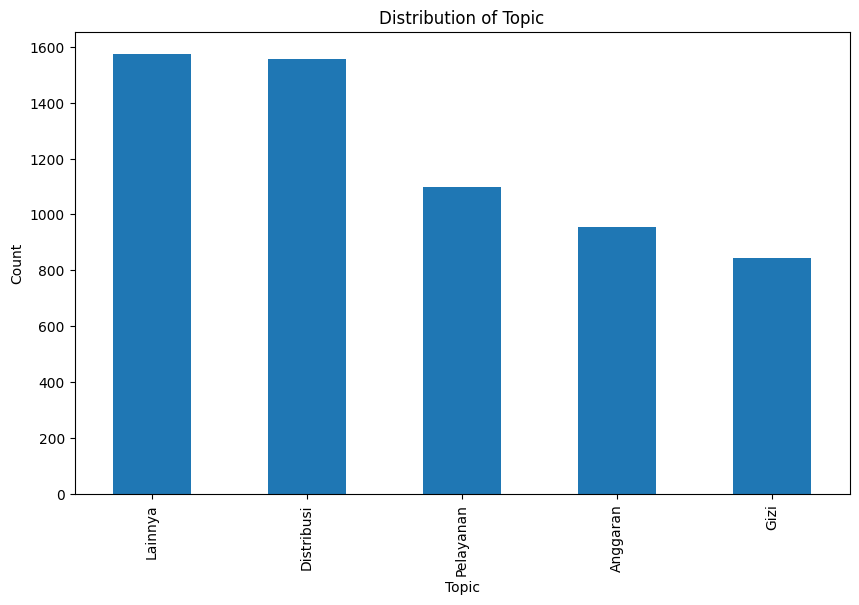

In [19]:
# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
df['specific_topic'].value_counts().plot(kind='bar')
plt.title('Distribution of Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

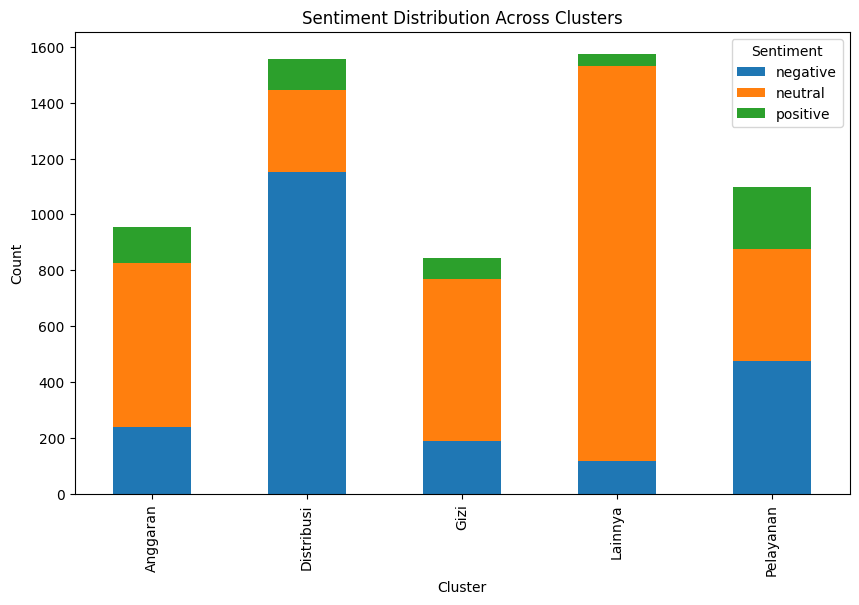

sentiment       negative  neutral  positive
specific_topic                             
Anggaran             240      588       127
Distribusi          1152      293       110
Gizi                 188      581        74
Lainnya              119     1413        43
Pelayanan            477      398       223


In [20]:
# Crosstab to see the distribution of sentiments in each cluster
sentiment_cluster_distribution = pd.crosstab(df['specific_topic'], df['sentiment'])


sentiment_cluster_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
print(sentiment_cluster_distribution)

In [21]:
custom_stopwords = ['gemoysian', 'makan', 'siang', 'gibran' ,'simak', 'sangat',' one', 'with', 'kawin', 'sahabatganjar',
                   'subianto', '02', 'gayeng']

df['full_text'] = df['full_text'].apply(lambda x: preprocess_text(x, custom_stopwords))

In [22]:
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['full_text'])

num_topics = 6  # Number of topics to discover
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Display the top words for each topic
feature_names = tfidf.get_feature_names_out()
topic_words = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_idx = topic.argsort()[:-20 - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    topic_words[f'Topic {topic_idx + 1}'] = top_features

print("Top words for each topic:")
for topic, words in topic_words.items():
    print(topic, ": ", words)

# Assign topics to documents
df['topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

print("Documents with their assigned topics:")
print(df[['full_text', 'topic']])

# Count the number of documents assigned to each topic
topic_counts = df['topic'].value_counts().sort_index()
topic_counts.index = [f'Topic {i + 1}' for i in topic_counts.index]

print("\nNumber of documents assigned to each topic:")
print(topic_counts)

Top words for each topic:
Topic 1 :  ['susu', 'tak', 'sayur', 'untukanakpilihsusuanak', 'gratis', 'dokter', 'pemkab', 'manis', 'kental', 'gizi', 'daging', 'belimbing', 'memastikan', 'kartu', 'jokowi', 'begini', 'mengalami', 'orang', 'tersebut', 'cara']
Topic 2 :  ['asuh', 'bapak', 'bantuan', 'kabupaten', 'bupati', 'bunda', 'pj', 'nasional', 'hari', '2023', 'berikan', 'salurkan', 'dukung', 'ketua', 'selengkapnya', 'news', 'makanan', 'paket', 'nyata', 'tua']
Topic 3 :  ['babinsa', 'bantuan', 'koramil', 'melaksanakan', 'tambahan', 'makanan', 'kegiatan', 'pemberian', 'peduli', 'bersama', 'pendampingan', 'kodim', 'kec', 'balita', 'kab', 'posyandu', 'penderita', 'bhabinkamtibmas', 'berikan', 'polsek']
Topic 4 :  ['banyak', 'sekolah', 'gratis', 'bikin', 'anaknya', 'dikasih', 'malah', 'gizi', 'lo', 'susu', 'kurang', 'orang', 'tau', 'rokok', 'padahal', 'bener', 'bilang', 'minum', 'gimana', 'sekarang']
Topic 5 :  ['gizi', 'tumbuh', 'masalah', 'pertumbuhan', 'kesehatan', 'tinggi', 'kembang', 'pro

In [23]:
# Assign topics to documents
df['bps_topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

# Map topic values to the specified labels
topic_labels = {  
    0: "Kesehatan",      
    1: "Pangan",     
    2: "Perlindungan Sosial",
    3: "Pendidikan",  
    4: "Perumahan",
    5: "Gizi"
}

df['bps_topic'] = df['bps_topic'].map(topic_labels)

# Print documents with their assigned topics
print("Documents with their assigned topics:")
print(df[['full_text', 'bps_topic']])

Documents with their assigned topics:
                                              full_text            bps_topic
0     halo semuanya memiliki project donasi salurkan...            Perumahan
1     gerakan bapak asuh dandim 1418mamuju selenggar...               Pangan
2     kolaborasi 3 pilar memberikan bantuan mengalam...  Perlindungan Sosial
3     permasalahan terjadi mulai kandungan baru terl...                 Gizi
4     1 hingga kini masalah serius merupakan kondisi...            Perumahan
...                                                 ...                  ...
6021  perhatikan pola asuh kandungan gizi makanan te...            Perumahan
6022  daddyminussugar recehtapisayng eh segitu tau e...           Pendidikan
6023  ah ide trus tar status gizi misal 2th berat br...           Pendidikan
6024  schfess bukannya dicegah sejak 1000 hari lahir...                 Gizi
6025                     mas_veel kadrun dibungkam otak            Perumahan

[6026 rows x 2 columns]


In [24]:
# Menampilkan sampel data berdasarkan setiap aspek
samples_by_topic = df.groupby('bps_topic').apply(lambda x: x.sample(n=3))

# Menampilkan hasil
samples_by_topic

/tmp/ipykernel_33/1306943187.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples_by_topic = df.groupby('bps_topic').apply(lambda x: x.sample(n=3))


full_text  \
bps_topic                                                                     
Gizi                2912        community feeding center siantan hilir bayi   
                    4463  fake__ids menyangkut prioritas efisiensi angga...   
                    152   yu rutin minum ttd remaja putri lemah letih le...   
Kesehatan           3551                         100 26 antaranya menderita   
                    3713     selektif pemilihan susu untukanakpilihsusuanak   
                    3818  nyaris sepuluh tahun memimpin negeri baru sada...   
Pangan              624   lumajangmenuju hut bhayangkara ke77 dilaksanak...   
                    2273  lantas tips abcde video berikut ayo abcde bagi...   
                    3024  wujudkan badung bebas dinas sosial badung gela...   
Pendidikan          1909  g4kta nengevvvaaa kurawa whatt prestasi daerah...   
                    5650        ntar susah gemuk tumbuh tinggi kayak ngamuk   
                    163   cambodia bukannya negara miskin cukup tinggi d...   
Perlindungan Sosial 1509  bentuk komitmen polres lbatu dlm dukung pemeri...   
                    2661  ketua pkk medan berikan makanan tambahan medan...   
                    1245  kapolres cimahi akbp aldi subartono sh sik mh ...   
Perumahan           4937  tim wasev meninjau sasaran fisik tmmd berupa c...   
                    3515  memberikan keyakinan pemerintahan memberdayaka...   
                    2088     lebih masuk akal ledakan jumlah lahir kualitas   

                         sentiment  topic specific_topic            bps_topic  
bps_topic                                                                      
Gizi                2912   neutral      5      Pelayanan                 Gizi  
                    4463  positive      5     Distribusi                 Gizi  
                    152   negative      5        Lainnya                 Gizi  
Kesehatan           3551   neutral      0     Distribusi            Kesehatan  
                    3713   neutral      0     Distribusi            Kesehatan  
                    3818  positive      0      Pelayanan            Kesehatan  
Pangan              624    neutral      1        Lainnya               Pangan  
                    2273   neutral      1           Gizi               Pangan  
                    3024   neutral      1           Gizi               Pangan  
Pendidikan          1909  negative      3     Distribusi           Pendidikan  
                    5650  negative      3     Distribusi           Pendidikan  
                    163   negative      3      Pelayanan           Pendidikan  
Perlindungan Sosial 1509   neutral      2        Lainnya  Perlindungan Sosial  
                    2661   neutral      2        Lainnya  Perlindungan Sosial  
                    1245   neutral      2        Lainnya  Perlindungan Sosial  
Perumahan           4937   neutral      4        Lainnya            Perumahan  
                    3515   neutral      4           Gizi            Perumahan  
                    2088  negative      4      Pelayanan            Perumahan

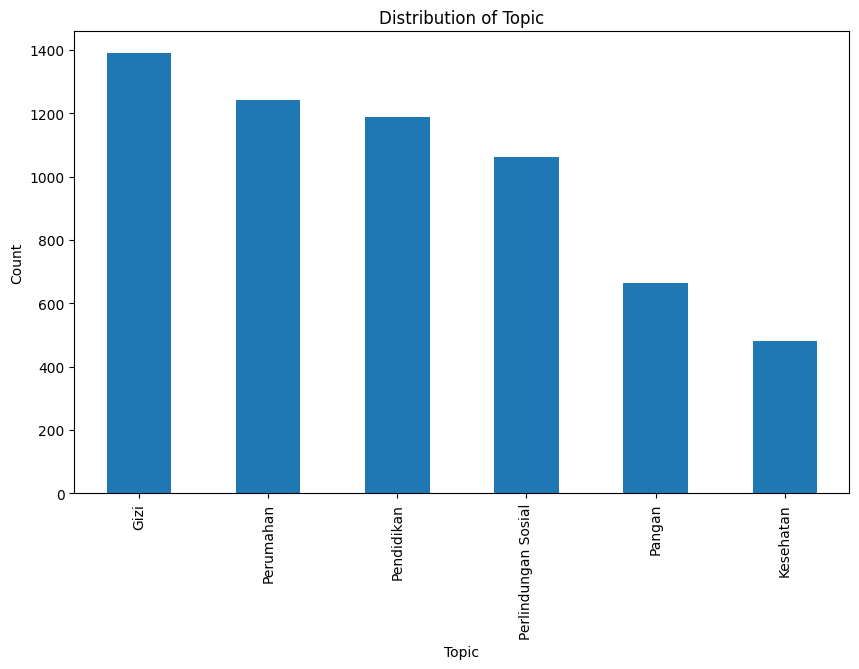

In [25]:
# Plot the distribution of clusters
plt.figure(figsize=(10, 6))
df['bps_topic'].value_counts().plot(kind='bar')
plt.title('Distribution of Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

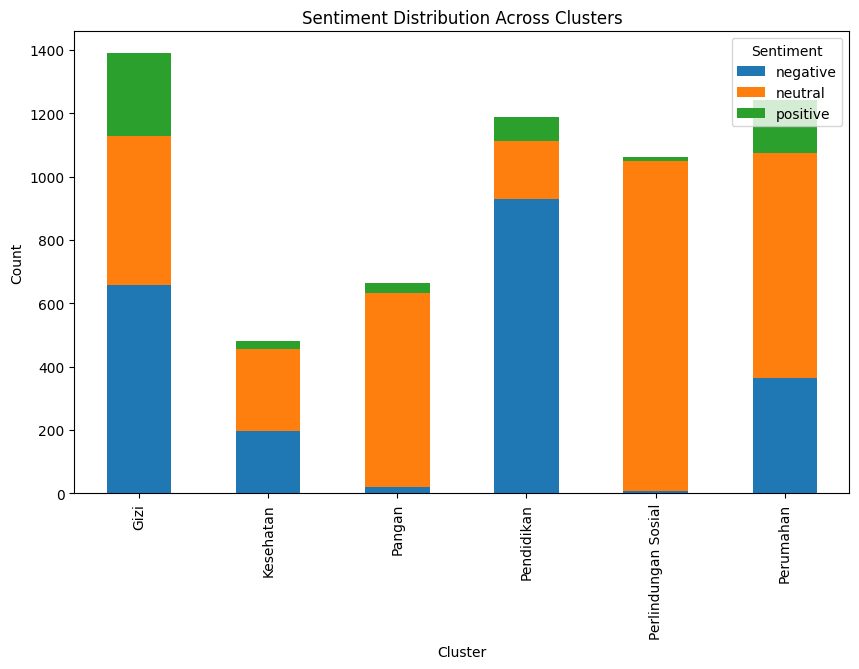

sentiment            negative  neutral  positive
bps_topic                                       
Gizi                      657      470       262
Kesehatan                 198      258        26
Pangan                     21      611        33
Pendidikan                929      182        77
Perlindungan Sosial         8     1041        12
Perumahan                 363      711       167


In [26]:
# Crosstab to see the distribution of sentiments in each cluster
sentiment_cluster_distribution = pd.crosstab(df['bps_topic'], df['sentiment'])


sentiment_cluster_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
print(sentiment_cluster_distribution)

In [27]:
df.to_csv('topic.csv', index=False)